In [ ]:
# Experiment-1: Fourier Transform and Short-Time Fourier Transform (STFT)

In [ ]:
%cd /content
%mkdir dl_a1

/content


In [ ]:
 %cd /content/dl_a1
!wget https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2


/content/dl_a1
--2025-03-14 07:54:43--  https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2
Resolving data.keithito.com (data.keithito.com)... 138.199.37.230, 2400:52e0:1e00::864:1
Connecting to data.keithito.com (data.keithito.com)|138.199.37.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2748572632 (2.6G) [text/plain]
Saving to: ‘LJSpeech-1.1.tar.bz2’

LJSpeech-1.1.tar.bz 100%[===================>]   2.56G   231MB/s    in 25s     

2025-03-14 07:55:08 (104 MB/s) - ‘LJSpeech-1.1.tar.bz2’ saved [2748572632/2748572632]



In [ ]:
%cd /content/dl_a1
!tar -xvjf LJSpeech-1.1.tar.bz2

Streaming output truncated to the last 5000 lines.
LJSpeech-1.1/wavs/LJ022-0089.wav
LJSpeech-1.1/wavs/LJ030-0192.wav
LJSpeech-1.1/wavs/LJ041-0078.wav
LJSpeech-1.1/wavs/LJ045-0249.wav
LJSpeech-1.1/wavs/LJ034-0035.wav
LJSpeech-1.1/wavs/LJ010-0152.wav
LJSpeech-1.1/wavs/LJ036-0174.wav
LJSpeech-1.1/wavs/LJ035-0076.wav
LJSpeech-1.1/wavs/LJ032-0176.wav
LJSpeech-1.1/wavs/LJ046-0113.wav
LJSpeech-1.1/wavs/LJ017-0096.wav
LJSpeech-1.1/wavs/LJ004-0098.wav
LJSpeech-1.1/wavs/LJ010-0147.wav
LJSpeech-1.1/wavs/LJ042-0230.wav
LJSpeech-1.1/wavs/LJ041-0033.wav
LJSpeech-1.1/wavs/LJ045-0229.wav
LJSpeech-1.1/wavs/LJ014-0199.wav
LJSpeech-1.1/wavs/LJ002-0082.wav
LJSpeech-1.1/wavs/LJ006-0055.wav
LJSpeech-1.1/wavs/LJ045-0120.wav
LJSpeech-1.1/wavs/LJ050-0028.wav
LJSpeech-1.1/wavs/LJ045-0215.wav
LJSpeech-1.1/wavs/LJ013-0121.wav
LJSpeech-1.1/wavs/LJ008-0025.wav
LJSpeech-1.1/wavs/LJ005-0240.wav
LJSpeech-1.1/wavs/LJ044-0026.wav
LJSpeech-1.1/wavs/LJ048-0127.wav
LJSpeech-1.1/wavs/LJ006-0195.wav
LJSpeech-1.1/wavs/LJ030-0

In [ ]:
!pip install torchaudio librosa boto3

import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Experiment-1(A): Fourier Transform for Speech Signal Analysis

In [ ]:
#  Audio file from the dataset
audio_path = "/content/dl_a1/LJSpeech-1.1/wavs/LJ001-0025.wav"

Audio Signal Shape: (195485,)
Sampling Rate: 22050 Hz


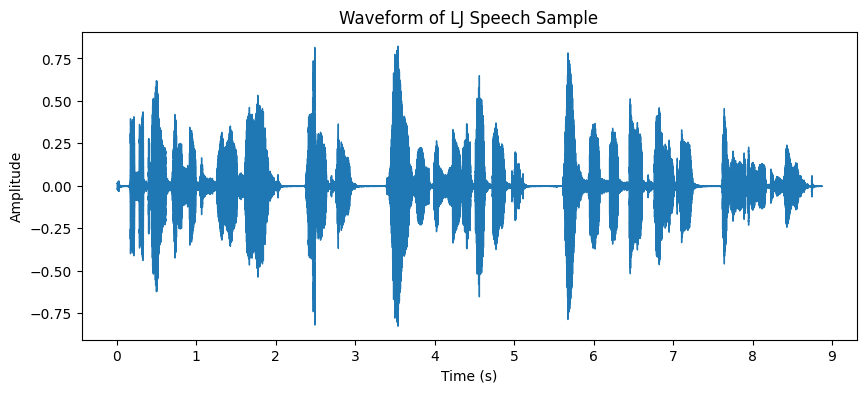

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
y, sr = librosa.load(audio_path, sr=None)  # Load with original sampling rate

# Display audio information
print(f"Audio Signal Shape: {y.shape}")
print(f"Sampling Rate: {sr} Hz")

# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of LJ Speech Sample")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
# Apply FFT to obtain frequency spectrum
fft_spectrum = np.fft.fft(y)
frequencies = np.fft.fftfreq(len(y), d=1/sr)

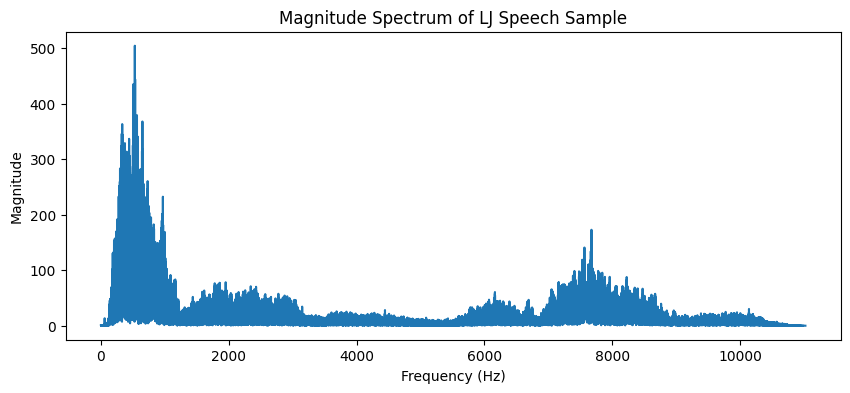

In [ ]:
#Frequency Spectrum Plot
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_spectrum[:len(fft_spectrum)//2]))
plt.title("Magnitude Spectrum of LJ Speech Sample")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()


In [ ]:
#Experiment 1(B): Short-Time Fourier Transform (STFT) for Speech Analysis

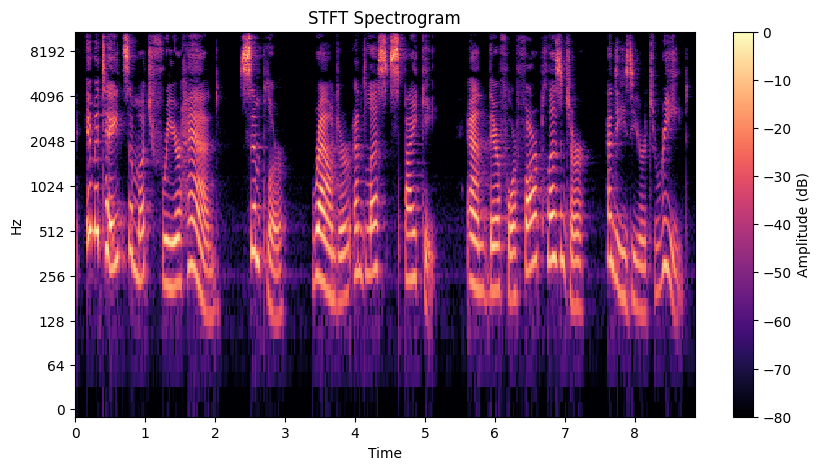

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


# Compute STFT
n_fft = 1024   # FFT window size
hop_length = 512  # Hop size
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

# Convert to dB for visualization
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(D_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(label='Amplitude (dB)')
plt.title('STFT Spectrogram')
plt.show()

In [ ]:
# Experiment-2: Energy Distribution in Vowels and Consonants

In [ ]:
# Compute energy in different frequency bands
def compute_band_energy(signal, sr, bands):
    stft = np.abs(librosa.stft(signal)) ** 2
    freqs = librosa.fft_frequencies(sr=sr)
    energy = {}
    for band in bands:
        band_indices = np.where((freqs >= band[0]) & (freqs <= band[1]))[0]
        energy[f'{band[0]}-{band[1]} Hz'] = np.sum(stft[band_indices, :])
    return energy

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Load speech signal
file_path = audio_path
signal, sr = librosa.load(file_path, sr=None)

time = np.linspace(0, len(signal) / sr, num=len(signal))

In [ ]:
# Define phoneme segment (manually determined or automatic)
start_time = 0.4  # in seconds
end_time = 0.6  # in seconds
start_sample = int(start_time * sr)
end_sample = int(end_time * sr)
phoneme_segment = signal[start_sample:end_sample]



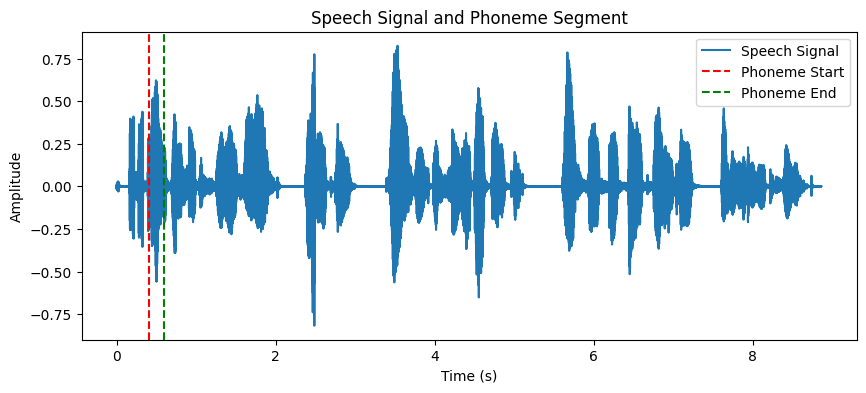

In [ ]:
# Plot waveform
plt.figure(figsize=(10, 4))
plt.plot(time, signal, label='Speech Signal')
plt.axvline(x=start_time, color='r', linestyle='--', label='Phoneme Start')
plt.axvline(x=end_time, color='g', linestyle='--', label='Phoneme End')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Speech Signal and Phoneme Segment')
plt.legend()
plt.show()



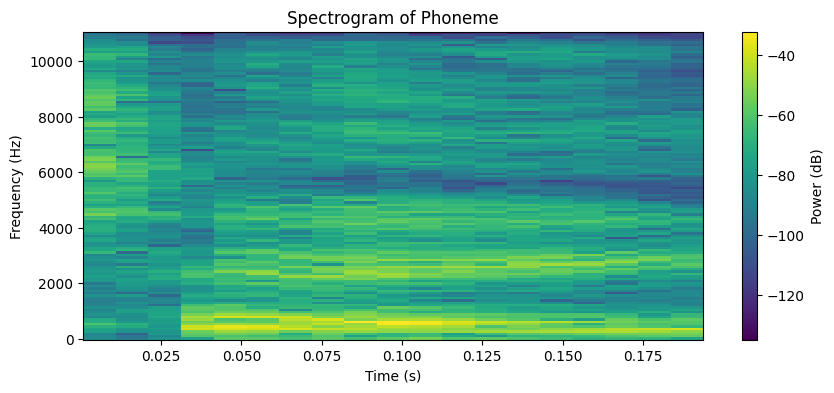

In [ ]:
# Compute and display spectrogram
f, t, Sxx = spectrogram(phoneme_segment, sr)
plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Spectrogram of Phoneme')
plt.colorbar(label='Power (dB)')
plt.show()


In [21]:
# The segment is taken from 0.3 seconds to 0.4 seconds into the signal.
vowel_segment = signal[int(0.3 * sr):int(0.4 * sr)]
# The segment is taken from 0.7 seconds to 0.75 seconds into the signal.
consonant_segment = signal[int(0.7 * sr):int(0.75 * sr)]


In [ ]:
# (300, 3000) Hz represents a lower frequency band, typically important for vowels.
# (4000, 8000) Hz represents a higher frequency band, often important for consonants.
bands = [(300, 3000), (4000, 8000)]
#energy within the defined frequency bands for the vowel segment
vowel_energy = compute_band_energy(vowel_segment, sr, bands)
# Calculate the energy within the defined frequency bands for the consonant segment.
consonant_energy = compute_band_energy(consonant_segment, sr, bands)

print("Energy in frequency bands:")
print("Vowel:", vowel_energy)
print("Consonant:", consonant_energy)

Energy in frequency bands:
Vowel: {'300-3000 Hz': 46118.207, '4000-8000 Hz': 1722.2767}
Consonant: {'300-3000 Hz': 19.230667, '4000-8000 Hz': 14442.499}


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
